In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
param_fp = Path('/bsuhome/zacharykeskinen/scratch/spicy/param_npys')
ds = xr.open_dataset(param_fp.joinpath('param_stats.nc'))
ds = ds.sel(C = slice(0.01, 1))

fig_dir = Path('/bsuhome/zacharykeskinen/spicy-analysis/figures/params')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

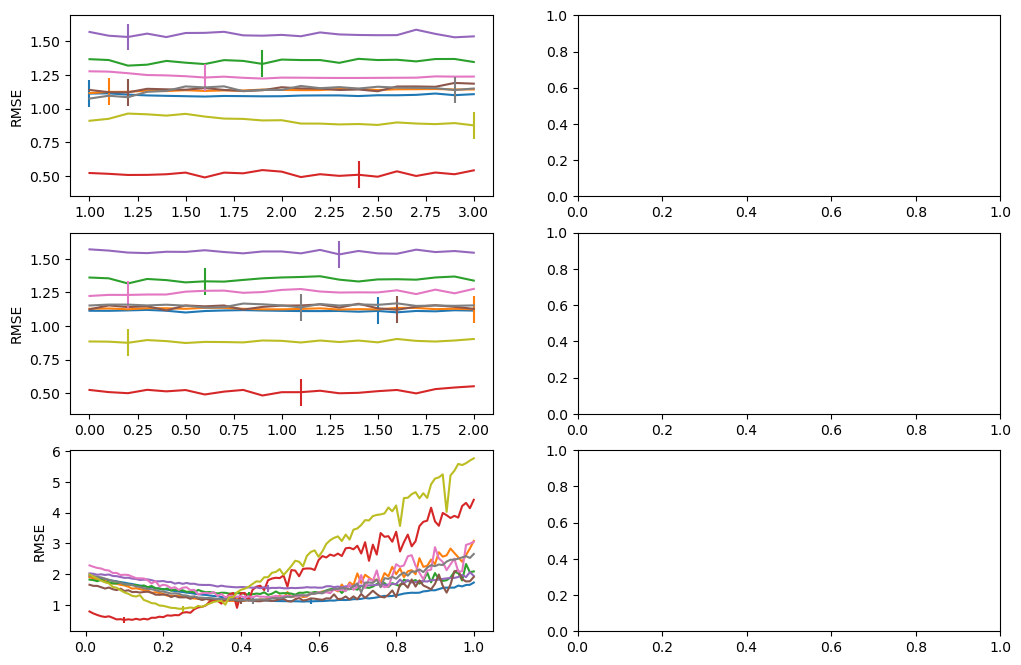

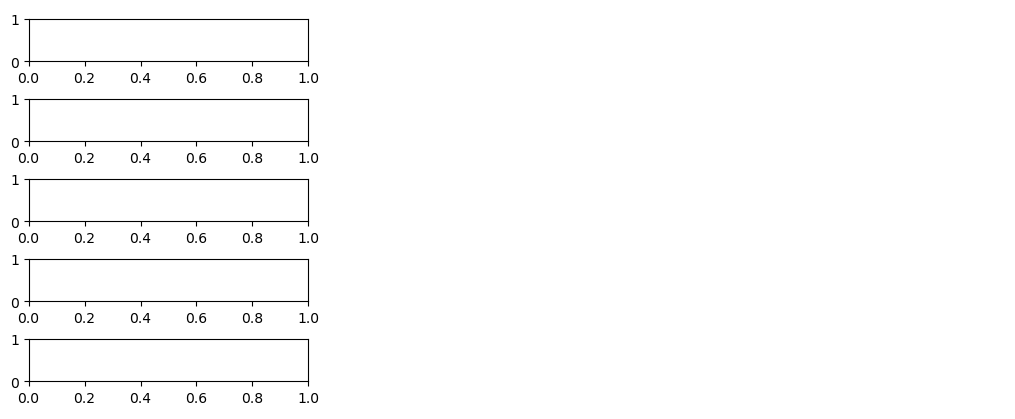

In [47]:
fig, axes = plt.subplots(3, 2, figsize = (12, 8))
for stat, ax in zip(['A', 'B', 'C'], axes[:, 0]):
    for i, (loc, sub) in enumerate(ds.groupby('location')):
        sub = sub.mean('iteration')
        c_best = sub.sel(C = sub['mae'].idxmin('C'))
        a_c_best = c_best.sel(A = c_best['pearsonr'].idxmax('A'))
        b_c_best = c_best.sel(B = c_best['pearsonr'].idxmax('B'))
        a_b_c_best = b_c_best.sel(A = b_c_best['pearsonr'].idxmax('A'))
        a, b, c = a_b_best.A, a_b_best.B, a_b_best.C
        if stat == 'A':
            ax.plot(b_c_best.A.values, b_c_best.rmse.values, color = f'C{i}')
            ax.errorbar(a_b_c_best.A.values, a_b_c_best.rmse.values, 0.1, color = f'C{i}')
            
        elif stat == 'B':
            ax.plot(a_c_best.B.values, a_c_best.rmse.values, color = f'C{i}')
            ax.errorbar(a_b_c_best.B.values, a_b_c_best.rmse.values, 0.1, color = f'C{i}')

        elif stat == 'C':
            a_best = sub.sel(A = sub['pearsonr'].idxmax('A'))
            a_b_best = a_best.sel(B = a_best['pearsonr'].idxmax('B'))

            ax.plot(a_b_best.C.values, a_b_best.rmse.values, color = f'C{i}')
            ax.errorbar(a_b_c_best.C.values, a_b_c_best.rmse.values, 0.1, color = f'C{i}')

    ax.set_ylabel('RMSE')
